In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [12]:
torch.log10(torch.tensor(1e38, dtype=torch.float32)).item()

38.0

In [13]:
torch.log10(torch.tensor(1e-45, dtype=torch.float32)).item()

-44.85346984863281

In [14]:
A = torch.tensor([[1, 2, 31], [3, 4, -1002]])
A.shape

torch.Size([2, 3])

In [15]:
A

tensor([[    1,     2,    31],
        [    3,     4, -1002]])

In [16]:
factors = (1 / torch.float_power(10, torch.arange(-45, 39, dtype=torch.int32))).to(dtype=torch.float32)
print(factors)

tensor([1.0000e+15, 1.0000e+14, 1.0000e+13, 1.0000e+12, 1.0000e+11, 1.0000e+10,
        1.0000e+09, 1.0000e+08, 1.0000e+07, 1.0000e+06, 1.0000e+05, 1.0000e+04,
        1.0000e+03, 1.0000e+02, 1.0000e+01, 1.0000e+00, 1.0000e-01, 1.0000e-02,
        1.0000e-03, 1.0000e-04, 1.0000e-05, 1.0000e-06, 1.0000e-07, 1.0000e-08,
        1.0000e-09, 1.0000e-10, 1.0000e-11, 1.0000e-12, 1.0000e-13, 1.0000e-14,
        1.0000e-15])


In [23]:
factors.dtype

torch.float32

In [24]:
A.unsqueeze(-1) * factors

tensor([[[ 1.0000e+15,  1.0000e+14,  1.0000e+13,  1.0000e+12,  1.0000e+11,
           1.0000e+10,  1.0000e+09,  1.0000e+08,  1.0000e+07,  1.0000e+06,
           1.0000e+05,  1.0000e+04,  1.0000e+03,  1.0000e+02,  1.0000e+01,
           1.0000e+00,  1.0000e-01,  1.0000e-02,  1.0000e-03,  1.0000e-04,
           1.0000e-05,  1.0000e-06,  1.0000e-07,  1.0000e-08,  1.0000e-09,
           1.0000e-10,  1.0000e-11,  1.0000e-12,  1.0000e-13,  1.0000e-14,
           1.0000e-15],
         [ 2.0000e+15,  2.0000e+14,  2.0000e+13,  2.0000e+12,  2.0000e+11,
           2.0000e+10,  2.0000e+09,  2.0000e+08,  2.0000e+07,  2.0000e+06,
           2.0000e+05,  2.0000e+04,  2.0000e+03,  2.0000e+02,  2.0000e+01,
           2.0000e+00,  2.0000e-01,  2.0000e-02,  2.0000e-03,  2.0000e-04,
           2.0000e-05,  2.0000e-06,  2.0000e-07,  2.0000e-08,  2.0000e-09,
           2.0000e-10,  2.0000e-11,  2.0000e-12,  2.0000e-13,  2.0000e-14,
           2.0000e-15],
         [ 3.1000e+16,  3.1000e+15,  3.1000e+14,  3.

In [47]:
torch.tensor(6.1974e+24, dtype=torch.float32)**2

tensor(inf)

In [48]:
torch.tensor(1e24, dtype=torch.float32) * torch.exp(-torch.tensor(1e24, dtype=torch.float32)**2 / 2)

tensor(0.)

In [32]:
def kernel(x):
    return x * torch.exp(-x**2 / 2)

def log_kernel_to_exp(x):
    x_sign = torch.sign(x)
    return x_sign * torch.exp(torch.log(torch.abs(x)) + -x**2 / 2)

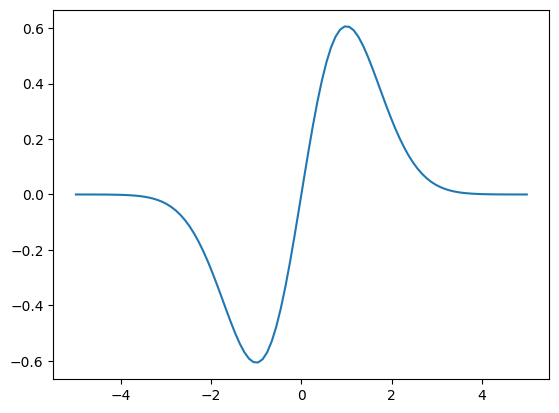

In [33]:
x_linspace = torch.linspace(-5, 5, 100)
y = log_kernel_to_exp(x_linspace)
plt.plot(x_linspace, y)
plt.show()

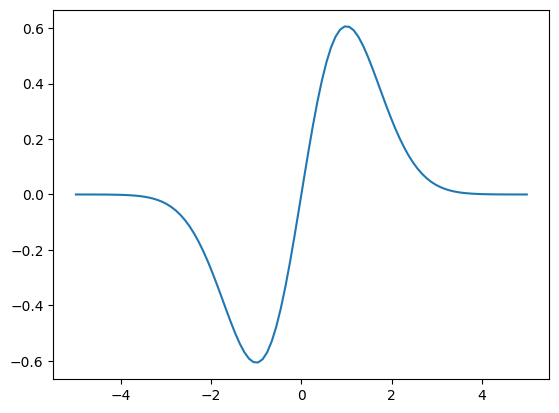

In [ ]:
x_linspace = torch.linspace(-5, 5, 100)
y = kernel(x_linspace)
plt.plot(x_linspace, y)
plt.show()

In [30]:
C = torch.sign(A).unsqueeze(-1) * 10**log_kernel_to_exp(torch.abs(A).unsqueeze(-1) * factors)
C[0, 1]

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.8650, 1.5705, 1.0471,
        1.0046, 1.0005, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000])

In [54]:
C = torch.tanh(torch.abs(A).unsqueeze(-1) * factors)
C[0, 1]

tensor([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 9.6403e-01, 1.9738e-01, 1.9997e-02,
        2.0000e-03, 2.0000e-04, 2.0000e-05, 2.0000e-06, 2.0000e-07, 2.0000e-08,
        2.0000e-09, 2.0000e-10, 2.0000e-11, 2.0000e-12, 2.0000e-13, 2.0000e-14,
        2.0000e-15])

/tmp/ipykernel_4122/165095264.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.log10(factors), C[0, 0])
/tmp/ipykernel_4122/165095264.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.log10(factors), C[0, 1])
/tmp/ipykernel_4122/165095264.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.log10(factors), C[0, 2])
/tmp/ipykernel_4122/165095264.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.log10(factors), C[1, 0])
/tmp/ipykernel_4122/165095264.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprec

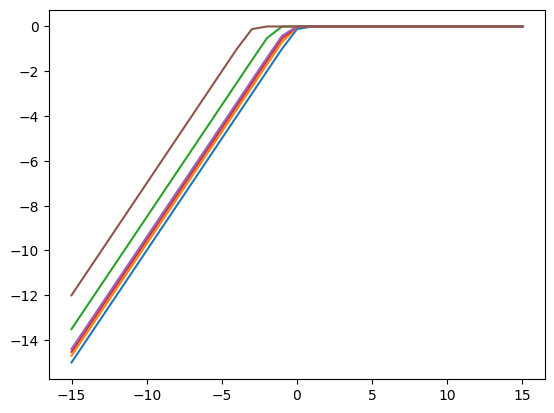

In [53]:
plt.plot(np.log10(factors), C[0, 0])
plt.plot(np.log10(factors), C[0, 1])
plt.plot(np.log10(factors), C[0, 2])
plt.plot(np.log10(factors), C[1, 0])
plt.plot(np.log10(factors), C[1, 1])
plt.plot(np.log10(factors), C[1, 2])

In [17]:
log_factors = - torch.arange(-45, 39, dtype=torch.float32)

In [14]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

In [19]:
B = torch.log10(torch.abs(A).unsqueeze(-1)) + log_factors
B = torch.sign(A.unsqueeze(-1)) * 4 * torch.sigmoid(B) * torch.sigmoid(-B)

In [20]:
torch.sign(A.unsqueeze(-1))

tensor([[[ 1],
         [ 1],
         [ 1]],

        [[ 1],
         [ 1],
         [-1]]])

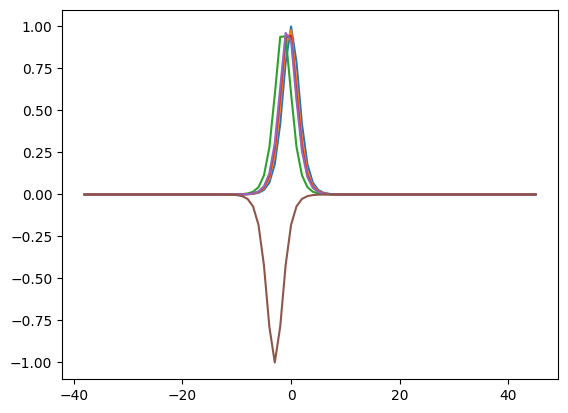

In [21]:
plt.plot(log_factors, B[0, 0])
plt.plot(log_factors, B[0, 1])
plt.plot(log_factors, B[0, 2])
plt.plot(log_factors, B[1, 0])
plt.plot(log_factors, B[1, 1])
plt.plot(log_factors, B[1, 2])

In [10]:
import torch

def cubic_bspline(x):
    """
    Compute the cubic B-spline basis function.

    Args:
        x (torch.Tensor): Input tensor

    Returns:
        torch.Tensor: Cubic B-spline values
    """
    x = x + 2

    # Initialize output tensor with zeros
    result = torch.zeros_like(x)

    # Case 1: 0 <= x < 1
    mask1 = (x >= 0) & (x < 1)
    result = torch.where(mask1, (1/6) * x**3, result)

    # Case 2: 1 <= x < 2
    mask2 = (x >= 1) & (x < 2)
    result = torch.where(mask2, (1/6) * (-3*x**3 + 12*x**2 - 12*x + 4), result)

    # Case 3: 2 <= x < 3
    mask3 = (x >= 2) & (x < 3)
    result = torch.where(mask3, (1/6) * (3*x**3 - 24*x**2 + 60*x - 44), result)

    # Case 4: 3 <= x <= 4
    mask4 = (x >= 3) & (x <= 4)
    result = torch.where(mask4, (1/6) * (4 - x)**3, result)

    return result
 

In [60]:
def hamming(x):
    mask = torch.abs(x) < 1
    y = torch.zeros_like(x)
    y[mask] = torch.cos(x[mask] * torch.pi) + 1
    return y

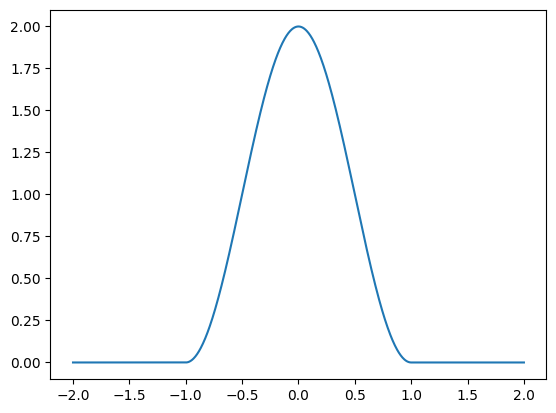

In [65]:
x_linspace = torch.linspace(-2, 2, 1000)
y = hamming(x_linspace)
plt.plot(x_linspace, y)
plt.show()

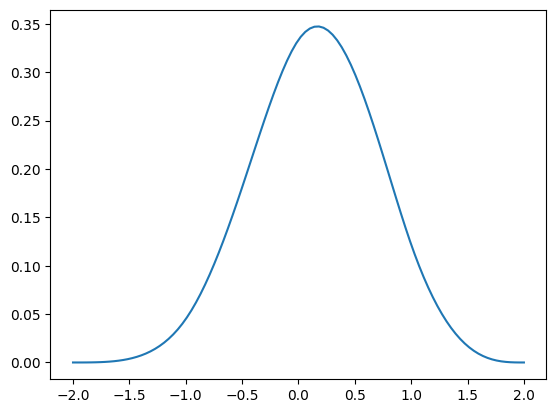

In [64]:
x_linspace = torch.linspace(-2, 2, 100)
y = sigmoid(x_linspace) * cubic_bspline(-x_linspace)
plt.plot(x_linspace, y)
plt.show()